In [133]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

matplotlib.rcParams['figure.figsize'] = (12,8) # Sets all future figure sizes

In [134]:
# Read in the data
df = pd.read_csv('movies.csv')

In [135]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


## Data cleaning

In [137]:
# Checking for missing data

for col in df.columns:
    print(df[col].isna().value_counts())

name
False    7668
Name: count, dtype: int64
rating
False    7591
True       77
Name: count, dtype: int64
genre
False    7668
Name: count, dtype: int64
year
False    7668
Name: count, dtype: int64
released
False    7666
True        2
Name: count, dtype: int64
score
False    7665
True        3
Name: count, dtype: int64
votes
False    7665
True        3
Name: count, dtype: int64
director
False    7668
Name: count, dtype: int64
writer
False    7665
True        3
Name: count, dtype: int64
star
False    7667
True        1
Name: count, dtype: int64
country
False    7665
True        3
Name: count, dtype: int64
budget
False    5497
True     2171
Name: count, dtype: int64
gross
False    7479
True      189
Name: count, dtype: int64
company
False    7651
True       17
Name: count, dtype: int64
runtime
False    7664
True        4
Name: count, dtype: int64


In [138]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull(),)
    print(f'{col}: {pct_missing}%')

name: 0.0%
rating: 0.010041731872717789%
genre: 0.0%
year: 0.0%
released: 0.0002608242044861763%
score: 0.0003912363067292645%
votes: 0.0003912363067292645%
director: 0.0%
writer: 0.0003912363067292645%
star: 0.00013041210224308815%
country: 0.0003912363067292645%
budget: 0.2831246739697444%
gross: 0.02464788732394366%
company: 0.002217005738132499%
runtime: 0.0005216484089723526%


**Handling missing values for those columns missing < 5% of data**

Introducing 'Unknown' value for rating

In [139]:
df.loc[df['rating'].isna() == True, 'rating'] = 'Unknown'

In [140]:
df['rating'].isna().value_counts()

rating
False    7668
Name: count, dtype: int64

Manually asigning release data

In [141]:
df[df['released'].isna() == True]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5728,Saw: The Final Chapter,R,Crime,2010,NaN,5.6,93000.0,Kevin Greutert,Patrick Melton,Tobin Bell,NaN,NaN,NaN,NaN,NaN
5730,The Wolfman,R,Drama,2010,NaN,5.8,104000.0,Joe Johnston,Andrew Kevin Walker,Benicio Del Toro,NaN,NaN,NaN,NaN,NaN


In [142]:
df.loc[df['name'] == 'Saw: The Final Chapter', 'released'] = '29 October, 2010 (United States)'

In [143]:
df.loc[df['name'] == 'The Wolfman', 'released'] = 'February 12, 2010 (United States)'

In [144]:
df[df['released'].isna() == True]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime


Manually inputing missing scores via IMDb or imputing via avereage score for that budget

In [145]:
df[df['score'].isna() == True]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7661,Love by Drowning,R,Drama,2020,"November 6, 2020 (United States)",NaN,NaN,Justin Kreinbrink,C.E. Poverman,Nicky Whelan,United States,1000000.0,NaN,Dow Jazz Films,121.0
7662,The Robinsons,Unknown,Action,2020,"November 10, 2020 (United States)",NaN,NaN,Directors,Aleks Alifirenko Jr.,Billy Hartmann,United States,10000.0,NaN,NaN,90.0
7666,It's Just Us,Unknown,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [146]:
df.loc[df['name'] == 'Love by Drowning', 'score'] = 7.2
df.loc[df['name'] == "It's Just Us", 'score'] = 8.4

In [147]:
# IMDb data not available for The Robinsons so asigning score based on movies with similar budgets
print(df['score'][(df['budget'] > 5000.0) & (df['budget'] < 15000.0)].count())
print(np.mean(df['score'][(df['budget'] > 5000.0) & (df['budget'] < 15000.0)].count()))

5
5.0


In [148]:
df.loc[df['name'] == "The Robinsons", 'score'] = 5.0

In [149]:
df[df['score'].isna() == True]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime


Imputing 'votes' values by budget

In [151]:
df[df['votes'].isna() == True]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7661,Love by Drowning,R,Drama,2020,"November 6, 2020 (United States)",7.2,NaN,Justin Kreinbrink,C.E. Poverman,Nicky Whelan,United States,1000000.0,NaN,Dow Jazz Films,121.0
7662,The Robinsons,Unknown,Action,2020,"November 10, 2020 (United States)",5.0,NaN,Directors,Aleks Alifirenko Jr.,Billy Hartmann,United States,10000.0,NaN,NaN,90.0
7666,It's Just Us,Unknown,Drama,2020,"October 1, 2020 (United States)",8.4,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [154]:
df.loc[df['name'] == 'Love by Drowning', 'votes'] = np.mean(df['votes'][df['budget'] < 1000000.0])
df.loc[df['name'] == "The Robinsons", 'votes'] = np.mean(df['votes'][df['budget'] < 15000])
df.loc[df['name'] == "It's Just Us", 'votes'] = np.mean(df['votes'][df['budget'] < 15000])

In [155]:
df[df['votes'].isna() == True]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime


Introducing 'Unknown' values for each of the remaining string type columns

In [157]:
string_cols = ['writer', 'star', 'country', 'company']

In [158]:
for col in string_cols:
    df.loc[df[col].isna() == True, col] = 'Unknown'

Imputing missing runtimes based on the average

In [163]:
df[df['runtime'].isna() == True]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5728,Saw: The Final Chapter,R,Crime,2010,"29 October, 2010 (United States)",5.6,93000.0,Kevin Greutert,Patrick Melton,Tobin Bell,Unknown,NaN,NaN,Unknown,NaN
5730,The Wolfman,R,Drama,2010,"February 12, 2010 (United States)",5.8,104000.0,Joe Johnston,Andrew Kevin Walker,Benicio Del Toro,Unknown,NaN,NaN,Unknown,NaN
6195,One for the Money,PG-13,Action,2012,"January 27, 2012 (United States)",5.3,41000.0,Julie Anne Robinson,Stacy Sherman,Katherine Heigl,United States,40000000.0,38084162.0,Lakeshore Entertainment,NaN
7665,Saving Mbango,Unknown,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN


In [161]:
np.mean(df['runtime'])

107.2616127348643

In [164]:
df.loc[df['runtime'].isna() == True, 'runtime'] = np.mean(df['runtime'])

In [165]:
df[df['runtime'].isna() == True]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime


Gross and budget missing data may not be replaceable. Deriving the missing data points from the other variables may introduce biases in the later correlations. For that reason we will proceed only with the available data. 

In [169]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

Checking for duplicate values

In [174]:
df.duplicated().sum()

0

Assessing movie correlations

<Axes: >

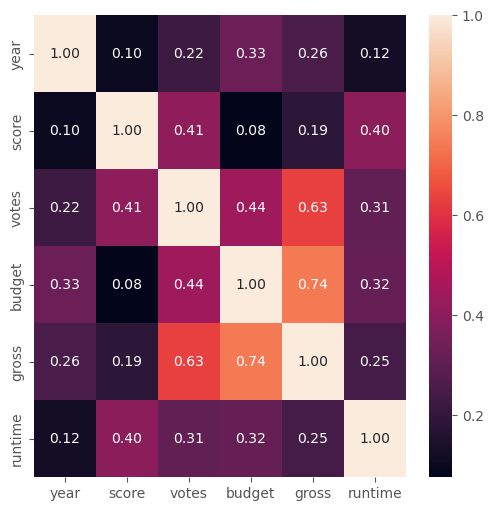

In [177]:
plt.figure(figsize=(6, 6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, fmt=".2f")

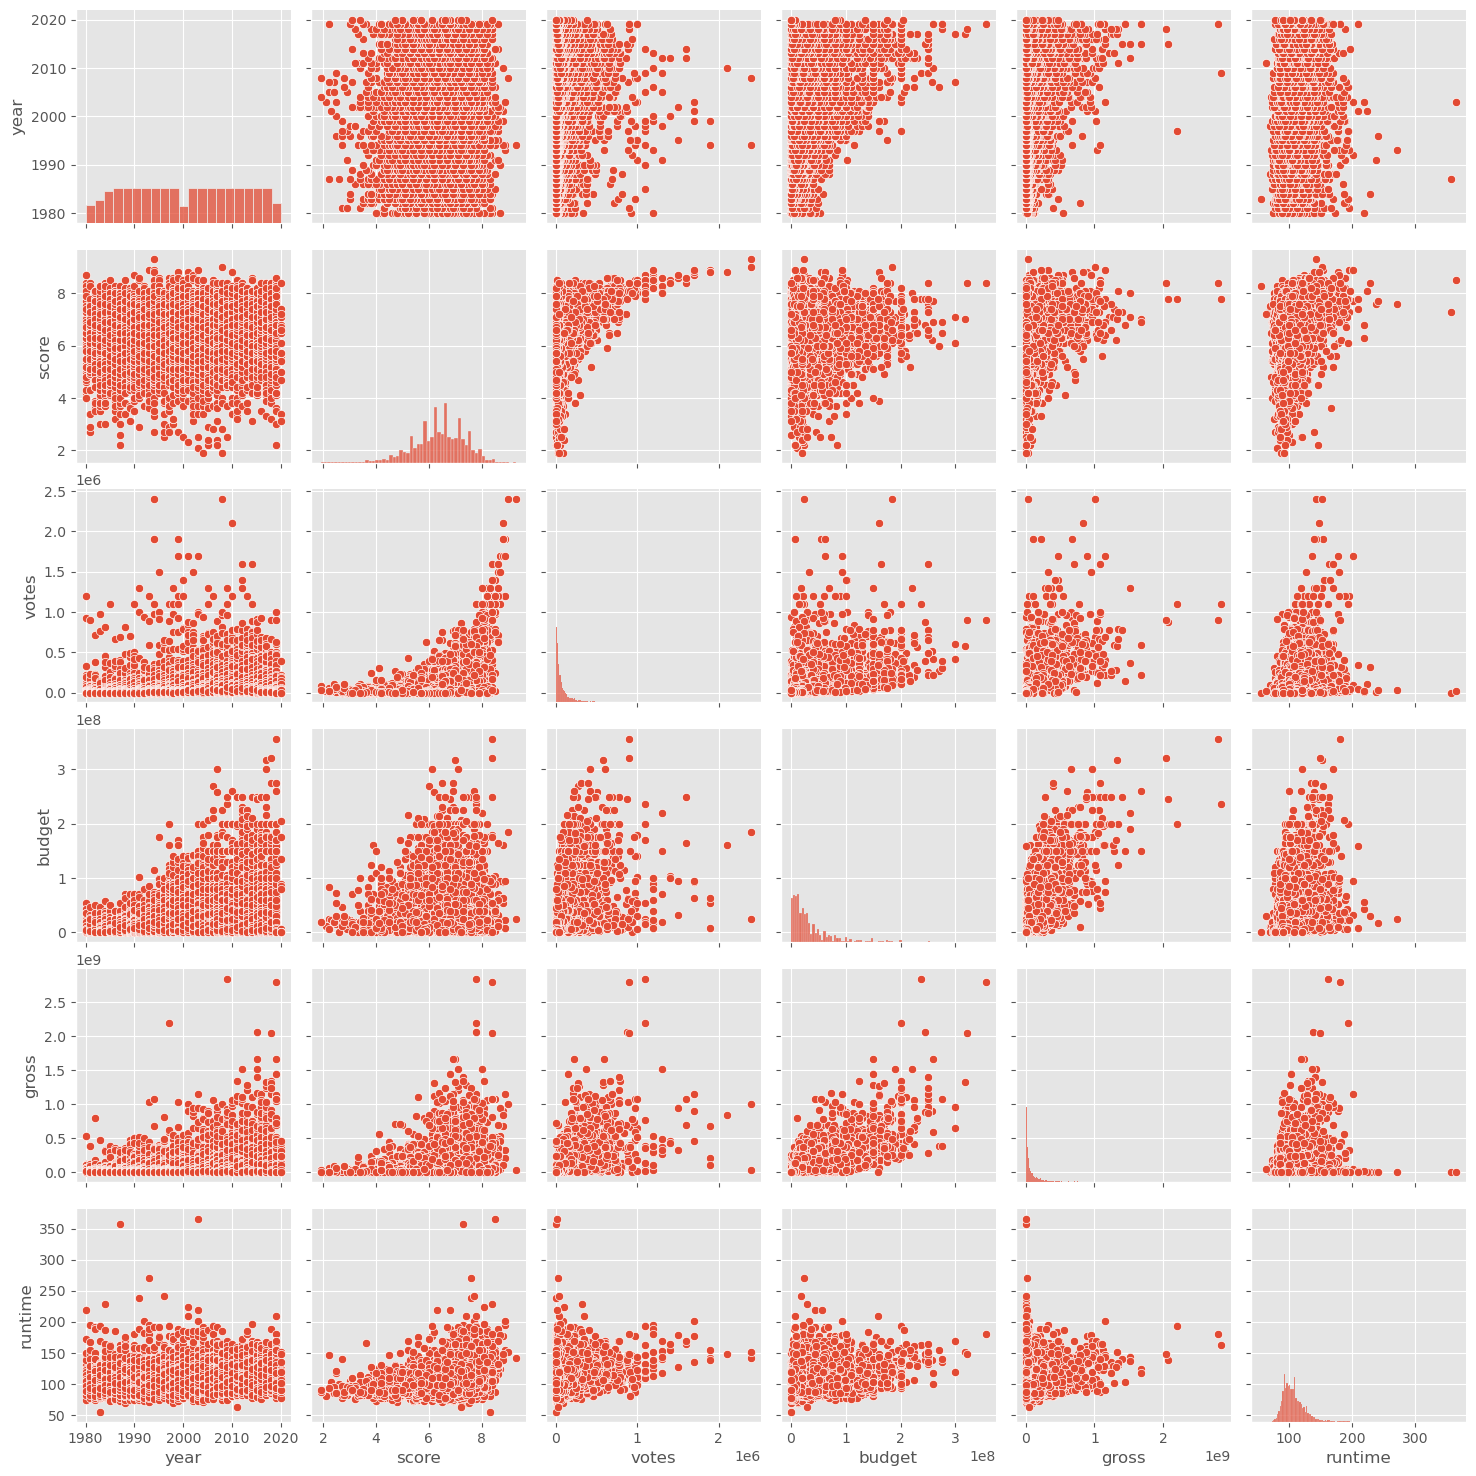

In [178]:
sns.pairplot(df)

To assess correlations with company the non-numeric data needs to be coded

In [200]:
# Replicating the df
df_coded = df

# Introducing numeric codes for each non-numeric column of the replicated df
for col in df_coded.columns:
    if(df_coded[col].dtype == 'object'):
        df_coded[col] = df_coded[col].astype('category')
        df_coded[col] = df_coded[col].cat.codes
        
df_coded

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1706,8.4,9.270000e+05,2589,4014,1047,54,19000000.0,46998772.0,2320,146.000000
1,5573,6,1,1980,1493,5.8,6.500000e+04,2269,1632,327,55,4500000.0,58853106.0,731,104.000000
2,5142,4,0,1980,1772,8.7,1.200000e+06,1111,2567,1745,55,18000000.0,538375067.0,1540,124.000000
3,286,4,4,1980,1493,7.7,2.210000e+05,1301,2000,2246,55,3500000.0,83453539.0,1812,88.000000
4,1027,6,4,1980,1544,7.3,1.080000e+05,1054,521,410,55,6000000.0,39846344.0,1777,98.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,10,6,2020,2965,3.1,1.800000e+01,1500,2289,2421,55,7000.0,NaN,2283,90.000000
7664,1678,10,4,2020,1108,4.7,3.600000e+01,774,2614,1886,55,NaN,NaN,539,90.000000
7665,4717,10,6,2020,194,5.7,2.900000e+01,2061,2683,2040,55,58750.0,NaN,941,107.261613
7666,2843,10,6,2020,2818,8.4,3.642557e+04,1184,1824,450,55,15000.0,NaN,2283,120.000000


<Axes: >

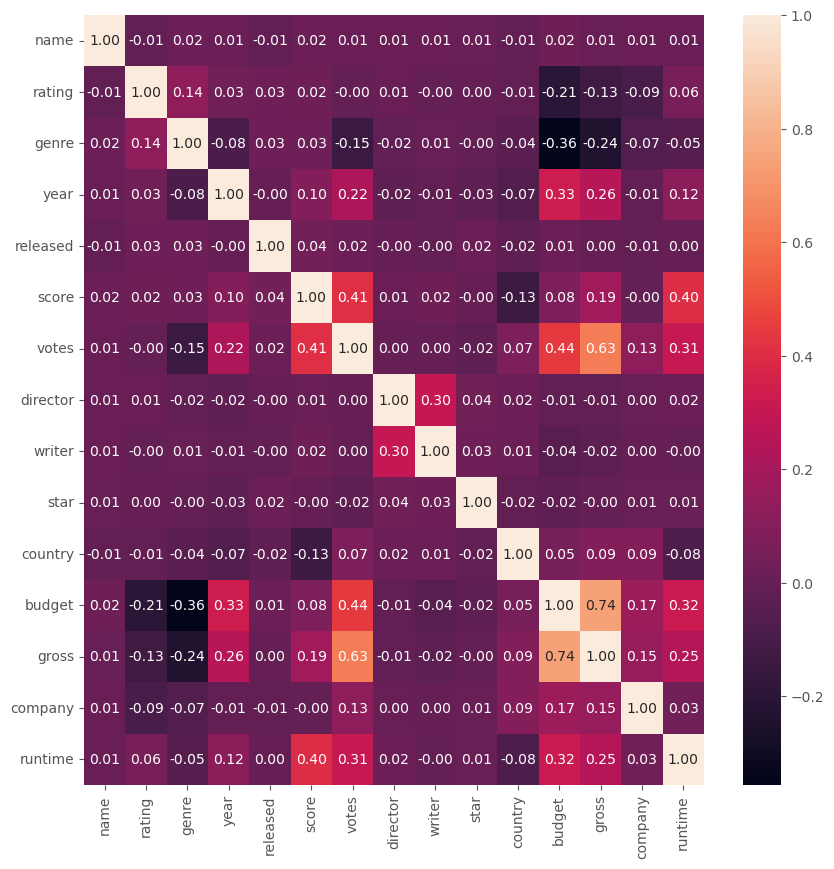

In [201]:
# Generating a new heat map for all of the columns, including the newly coded ones
plt.figure(figsize=(10, 10))
sns.heatmap(df_coded.corr(), annot=True, fmt=".2f")

Which companies generated the highest scores and grossed the most on average?

In [189]:
# Selecting only companies with greater than 10 films in the df

film_counts = df['company'].value_counts()

# Filter companies with at least 10 films
ten_film_companies = film_counts[film_counts >= 10].index

# Filtering the original df to only inclidue those companies
filtered_df = df[df['company'].isin(ten_film_companies)]

# Calculating average scores
average_scores = filtered_df.groupby('company')['score'].mean()

# Sort the companies by score
sorted_companies_score = average_scores.sort_values(ascending=False)

In [190]:
# Converting sorted companies to df for plotting
sorted_companies_score_df = sorted_companies_score.reset_index()
sorted_companies_score_df.columns = ['Company', 'Average Score']

Text(0.5, 1.0, 'Top Film Companies by Average Score (Minimum 10 Films)')

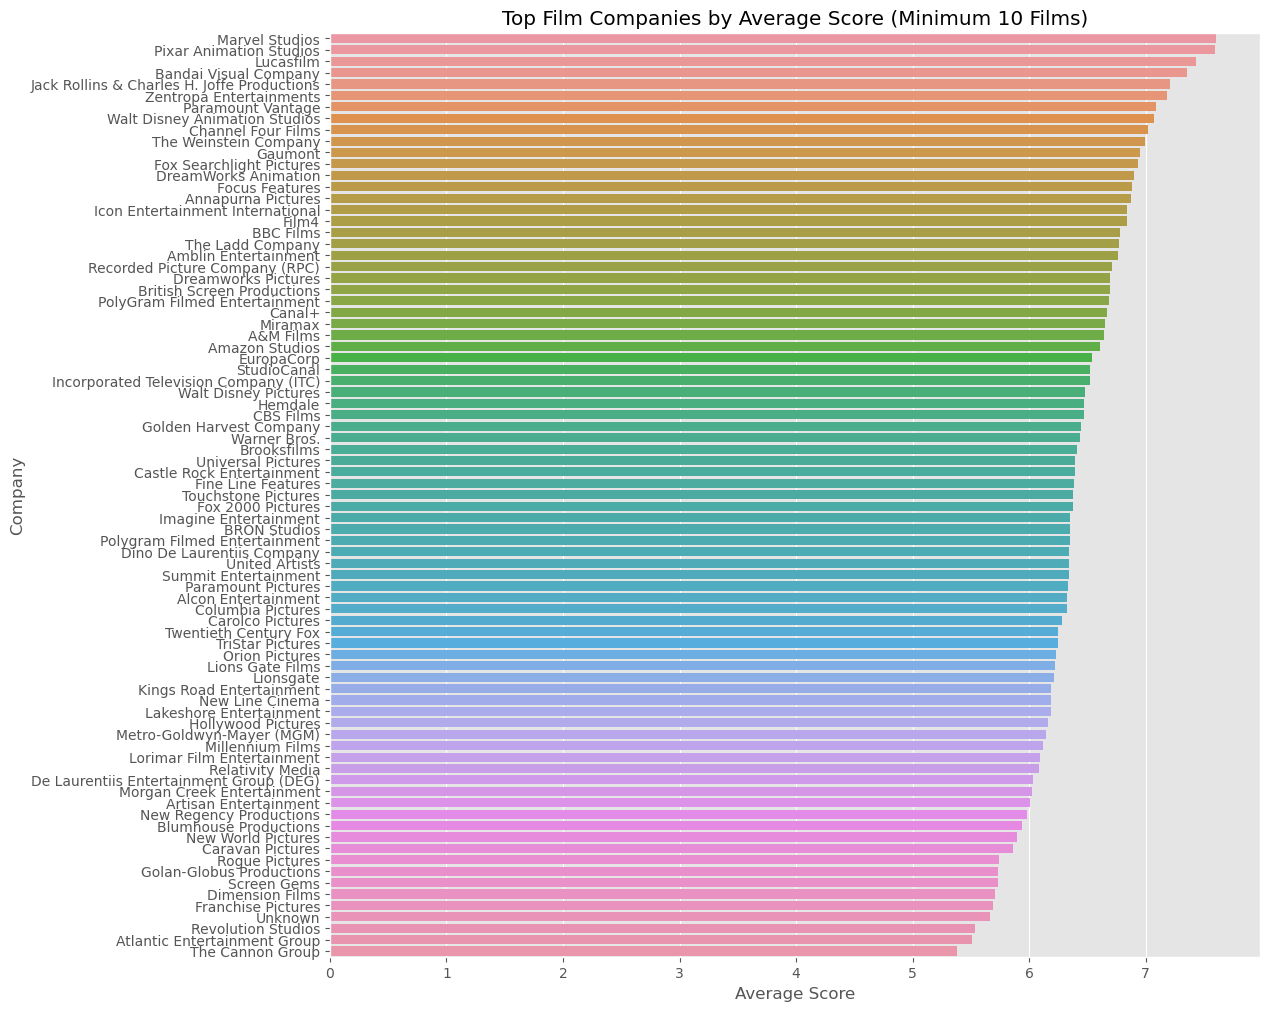

In [193]:
plt.figure(figsize=(12, 12))
sns.barplot(x='Average Score', y='Company', data=sorted_companies_score_df)
plt.title('Top Film Companies by Average Score (Minimum 10 Films)')

In [194]:
# Calculating average gross
average_gross = filtered_df.groupby('company')['gross'].mean()

# Sort the companies by gross
sorted_companies_gross = average_gross.sort_values(ascending=False)

In [196]:
# Converting sorted companies to df for plotting
sorted_companies_gross_df = sorted_companies_gross.reset_index()
sorted_companies_gross_df.columns = ['Company', 'Average Gross']

Text(0.5, 1.0, 'Top Film Companies by Average Gross (Minimum 10 Films)')

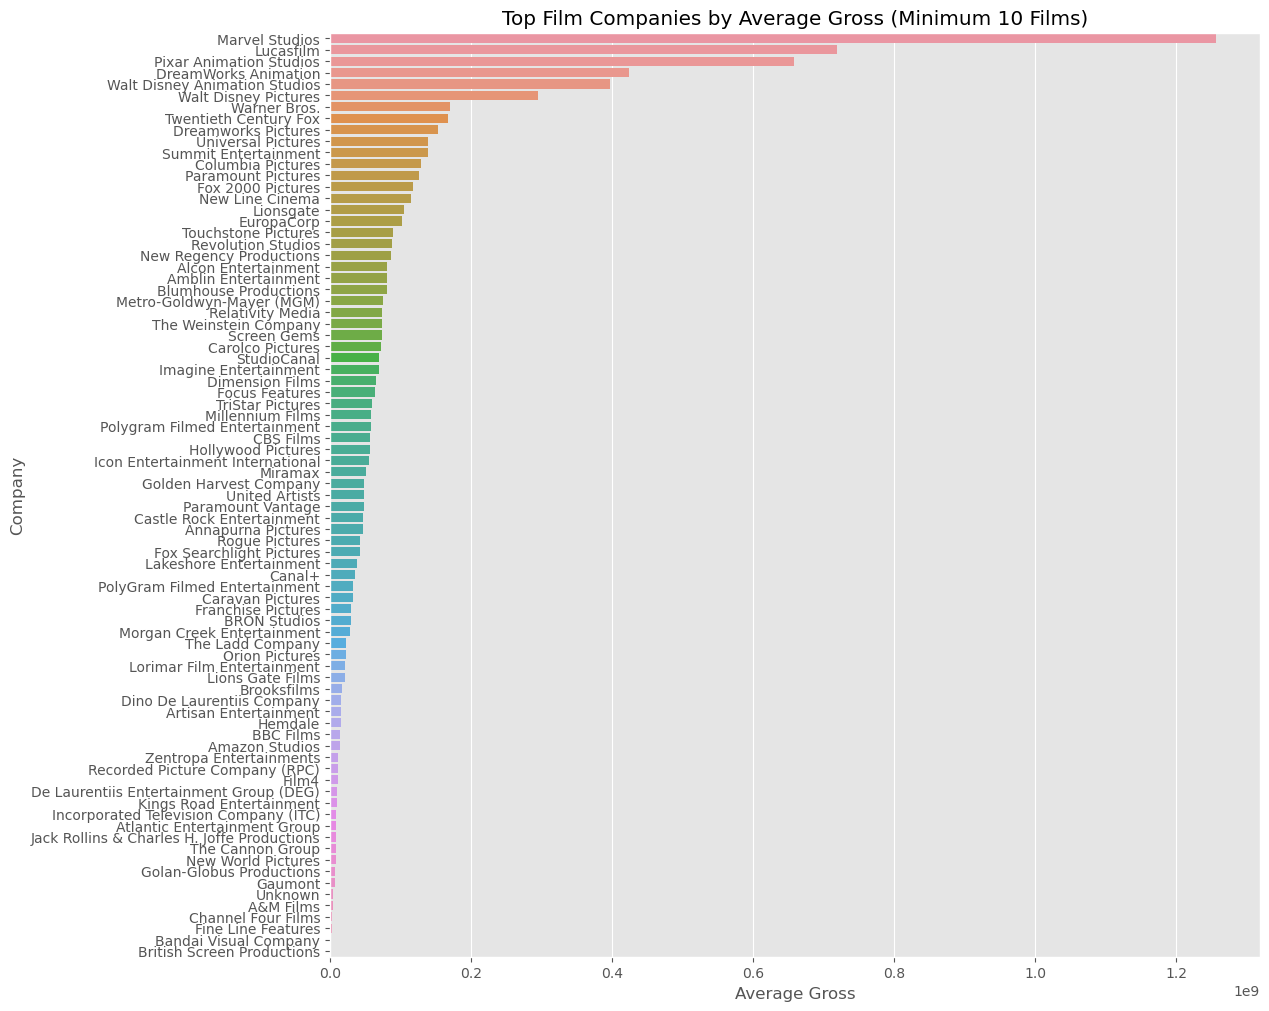

In [197]:
plt.figure(figsize=(12, 12))
sns.barplot(x='Average Gross', y='Company', data=sorted_companies_gross_df)
plt.title('Top Film Companies by Average Gross (Minimum 10 Films)')